In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#Lesson 6.1.5

In [5]:
pip install citipy


Note: you may need to restart the kernel to use updated packages.


In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [8]:
cities

['quatre cocos',
 'kudahuvadhoo',
 'mataura',
 'port hardy',
 'barrow',
 'erzin',
 'vaini',
 'jumla',
 'medea',
 'georgetown',
 'yellowknife',
 'rikitea',
 'jamestown',
 'constitucion',
 'palm coast',
 'cabra',
 'thompson',
 'ulaanbaatar',
 'qaanaaq',
 'raudeberg',
 'tasiilaq',
 'bambous virieux',
 'airai',
 'kapaa',
 'gadarwara',
 'butaritari',
 'albany',
 'hasaki',
 'baglung',
 'padang',
 'punta arenas',
 'veraval',
 'hermanus',
 'forrest city',
 'bethel',
 'bredasdorp',
 'xuddur',
 'dikson',
 'svetlaya',
 'sitka',
 'hilo',
 'lavrentiya',
 'tsihombe',
 'puerto ayora',
 'belmonte',
 'avarua',
 'tarudant',
 'hobart',
 'vieques',
 'beringovskiy',
 'aklavik',
 'cidreira',
 'mar del plata',
 'busselton',
 'hamilton',
 'ugoofaaru',
 'chuy',
 'ushuaia',
 'fortuna',
 'kresttsy',
 'mullaitivu',
 'waingapu',
 'khatanga',
 'iqaluit',
 'tumannyy',
 'kapit',
 'bluff',
 'upernavik',
 'arraial do cabo',
 'cherskiy',
 'taolanaro',
 'le moule',
 'vaitupu',
 'flin flon',
 'olinda',
 'ponta do sol',
 '

In [9]:
#Lesson 6.2.6

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Starting URL for Weather Map API Call.
    url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | quatre cocos
Processing Record 2 of Set 1 | kudahuvadhoo
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | port hardy
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | erzin
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | jumla
Processing Record 9 of Set 1 | medea
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | palm coast
Processing Record 16 of Set 1 | cabra
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | ulaanbaatar
Processing Record 19 of Set 1 | qaanaaq
Processing Record 20 of Set 1 | raudeberg
Processing Record 21 of Set 1 | tasiilaq
Processing Record 22 of Set 1 | bambous virieux
Processing Record 23 of Set 1 | ai

Processing Record 38 of Set 4 | mutare
Processing Record 39 of Set 4 | shatrovo
Processing Record 40 of Set 4 | kyra
Processing Record 41 of Set 4 | longyearbyen
Processing Record 42 of Set 4 | monrovia
Processing Record 43 of Set 4 | cumaribo
City not found. Skipping...
Processing Record 44 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 45 of Set 4 | live oak
Processing Record 46 of Set 4 | merauke
Processing Record 47 of Set 4 | dingle
Processing Record 48 of Set 4 | lloydminster
Processing Record 49 of Set 4 | malanje
Processing Record 50 of Set 4 | alice town
Processing Record 1 of Set 5 | bandarbeyla
Processing Record 2 of Set 5 | birjand
Processing Record 3 of Set 5 | ketchikan
Processing Record 4 of Set 5 | luderitz
Processing Record 5 of Set 5 | cayenne
Processing Record 6 of Set 5 | warsaw
Processing Record 7 of Set 5 | gillette
Processing Record 8 of Set 5 | blythe
Processing Record 9 of Set 5 | guthrie
Processing Record 10 of Set 5 | buren
Processing Re

Processing Record 25 of Set 8 | torbay
Processing Record 26 of Set 8 | otradnoye
Processing Record 27 of Set 8 | bilma
Processing Record 28 of Set 8 | carnarvon
Processing Record 29 of Set 8 | saldanha
Processing Record 30 of Set 8 | morant bay
Processing Record 31 of Set 8 | massaguet
Processing Record 32 of Set 8 | berea
Processing Record 33 of Set 8 | sao filipe
Processing Record 34 of Set 8 | beruni
City not found. Skipping...
Processing Record 35 of Set 8 | keflavik
Processing Record 36 of Set 8 | methoni
Processing Record 37 of Set 8 | calama
Processing Record 38 of Set 8 | arvika
Processing Record 39 of Set 8 | isangel
Processing Record 40 of Set 8 | yanchukan
City not found. Skipping...
Processing Record 41 of Set 8 | paamiut
Processing Record 42 of Set 8 | tyup
Processing Record 43 of Set 8 | omutinskoye
City not found. Skipping...
Processing Record 44 of Set 8 | florianopolis
Processing Record 45 of Set 8 | natal
Processing Record 46 of Set 8 | saint-joseph
Processing Record 

Processing Record 9 of Set 12 | adrar
Processing Record 10 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 11 of Set 12 | aden
Processing Record 12 of Set 12 | krasnokamensk
Processing Record 13 of Set 12 | myitkyina
Processing Record 14 of Set 12 | haian
Processing Record 15 of Set 12 | shimoda
Processing Record 16 of Set 12 | saleaula
City not found. Skipping...
Processing Record 17 of Set 12 | smoljan
Processing Record 18 of Set 12 | fasa
Processing Record 19 of Set 12 | ancud
Processing Record 20 of Set 12 | udachnyy
Processing Record 21 of Set 12 | paso de los toros
Processing Record 22 of Set 12 | miyako
Processing Record 23 of Set 12 | chisec
Processing Record 24 of Set 12 | sciacca
Processing Record 25 of Set 12 | belomorsk
Processing Record 26 of Set 12 | sangar
Processing Record 27 of Set 12 | gambela
Processing Record 28 of Set 12 | knysna
Processing Record 29 of Set 12 | cairns
Processing Record 30 of Set 12 | ambilobe
Processing Record 31 of Set 12 | be

In [13]:
len(city_data)

559

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
#Reorder Columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Quatre Cocos,MU,2021-05-25 22:31:46,-20.2078,57.7625,71.71,76,19,9.13
1,Kudahuvadhoo,MV,2021-05-25 22:35:28,2.6708,72.8944,84.18,71,99,21.79
2,Mataura,NZ,2021-05-25 22:35:28,-46.1927,168.8643,43.05,52,92,2.73
3,Port Hardy,CA,2021-05-25 22:35:29,50.6996,-127.4199,53.78,71,90,8.05
4,Barrow,US,2021-05-25 22:33:15,71.2906,-156.7887,26.62,86,90,6.91


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
#Lesson 6.3.1

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [19]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/25/21'

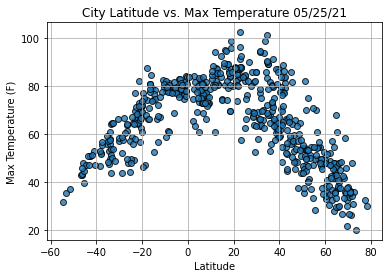

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [21]:
#Lesson 6.3.2

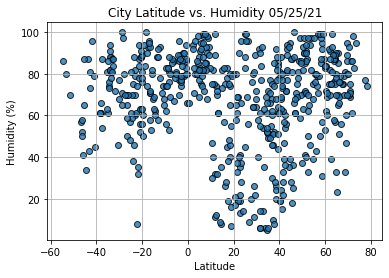

In [22]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

In [23]:
# Lesson 3.3.3

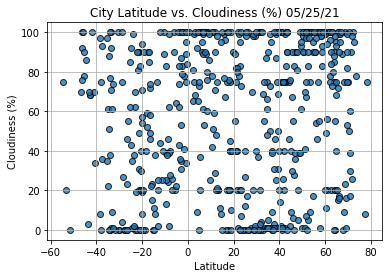

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [26]:
#Lesson 6.3.4

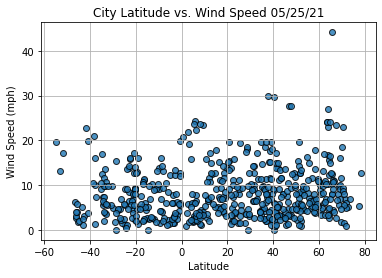

In [27]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()